# Example 2

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, Resistor, Line, Ground
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, network_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver

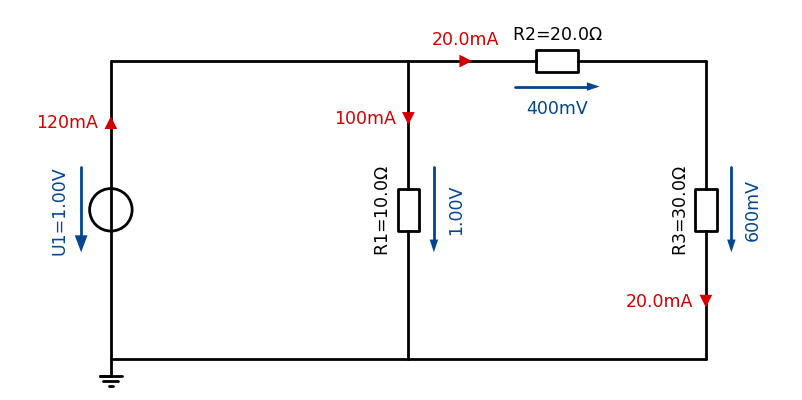

In [2]:
if __name__ == '__main__':
    with Schematic() as schematic:
        schematic += (U1:=VoltageSource(V=1, R=0, name='U1').up())
        schematic += Line().right()
        schematic += (R1:=Resistor(R=10, name='R1').down())
        schematic += Line().left()
        schematic += Ground()
        schematic += Resistor(R=20, name='R2').at(R1.start).right()
        schematic += Resistor(R=30, name='R3').down()
        schematic += Line().left()
        solution = nodal_analysis_solver(network_parser(schematic))
        schemdraw_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
        schematic += schemdraw_solution.draw_voltage('R1')
        schematic += schemdraw_solution.draw_current('R1')
        schematic += schemdraw_solution.draw_voltage('R2')
        schematic += schemdraw_solution.draw_current('R2')
        schematic += schemdraw_solution.draw_voltage('R3')
        schematic += schemdraw_solution.draw_current('R3', end=True)
        schematic += schemdraw_solution.draw_current('U1')